<a href="https://colab.research.google.com/github/sungjoonlee427/GDG-AI-STUDY/blob/main/%08Neural_Network_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# Fashion MNIST 데이터셋 로드
# - `train_input`: 훈련 데이터 (이미지 데이터, 총 60,000개)
# - `train_target`: 훈련 데이터 레이블 (정답 클래스, 총 60,000개)
# - `test_input`: 테스트 데이터 (이미지 데이터, 총 10,000개)
# - `test_target`: 테스트 데이터 레이블 (정답 클래스, 총 10,000개)
# - 데이터는 28x28 크기의 회색조 이미지이며, 레이블은 0~9 범위의 정수로 구성

train_scaled = train_input / 255.0
# 훈련 데이터를 정규화
# - 원본 데이터는 픽셀 값이 0~255 범위
# - 255로 나누어 데이터를 0~1 범위로 변환하여 모델 학습 효율 향상

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)
# 훈련 데이터를 훈련 세트와 검증 세트로 분리
# - `train_scaled`: 훈련 데이터의 80% (입력 데이터)
# - `val_scaled`: 검증 데이터의 20% (입력 데이터)
# - `train_target`: 훈련 데이터의 80% (정답 라벨)
# - `val_target`: 검증 데이터의 20% (정답 라벨)
# - `test_size=0.2`: 데이터의 20%를 검증 세트로 사용
# - `random_state=42`: 랜덤 시드를 설정하여 결과 재현 가능

# 요약:
# - Fashion MNIST 데이터를 로드하여 정규화한 뒤, 훈련 세트와 검증 세트로 분리
# - 이 코드는 모델 학습을 위한 데이터 전처리와 분할 과정을 포함

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
def model_fn(a_layer=None):
    # 사용자 정의 모델 생성 함수
    model = keras.Sequential()
    # Sequential 모델 초기화
    # - 층(layer)을 순차적으로 쌓아 구성하는 신경망 구조

    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    # 첫 번째 층: Flatten
    # - 입력 데이터 형태를 28x28 2D 이미지에서 784 크기의 1D 벡터로 변환
    # - 모델에 데이터를 입력하기 위한 전처리 단계

    model.add(keras.layers.Dense(100, activation='relu'))
    # 두 번째 층: Dense
    # - 은닉층으로 100개의 뉴런을 포함
    # - 활성화 함수로 ReLU (Rectified Linear Unit) 사용
    # - 입력 데이터의 비선형성을 학습하여 특징을 추출

    if a_layer:
        model.add(a_layer)
        # 조건부로 추가적인 층을 삽입
        # - `a_layer`가 None이 아닌 경우, 해당 층을 모델에 추가
        # - 이를 통해 유연한 모델 구조를 정의할 수 있음

    model.add(keras.layers.Dense(10, activation='softmax'))
    # 세 번째 층: 출력층(Dense)
    # - 10개의 뉴런을 포함 (10개의 클래스)
    # - 활성화 함수로 softmax 사용
    # - 출력 값은 각 클래스에 대한 확률로 해석됨

    return model
    # 모델 객체를 반환
    # - 생성된 모델을 학습 및 평가에 활용

# 요약:
# - `model_fn` 함수는 기본적인 신경망 모델을 정의하며, 조건에 따라 추가적인 층을 삽입할 수 있는 유연한 구조 제공
# - 입력 데이터는 28x28 이미지를 Flatten 층에서 벡터화한 뒤, 은닉층과 출력층을 통과하여 예측 값을 생성

In [5]:
model = model_fn()
# `model_fn` 함수를 호출하여 기본 모델 생성
# - 기본적으로 Flatten 층, 은닉층(Dense 100개), 출력층(Dense 10개)을 포함
# - `a_layer=None`로 호출되므로 추가적인 사용자 정의 층은 포함되지 않음

model.summary()
# 모델 요약 출력
# - 모델의 층 구성, 각 층의 출력 형태, 학습 가능한 파라미터의 수를 표시
# - 주요 정보:
#   - `Flatten`: 입력 데이터를 1D 벡터로 변환
#   - 첫 번째 `Dense`: 100개의 뉴런으로 은닉층 구성
#   - 두 번째 `Dense`: 10개의 뉴런으로 출력층 구성
# - 총 파라미터 수:
#   - Flatten 층에는 학습 가능한 파라미터가 없음
#   - 첫 번째 Dense 층: (입력 크기 784 * 뉴런 100) + 100 (bias) = 78,500개
#   - 두 번째 Dense 층: (입력 크기 100 * 뉴런 10) + 10 (bias) = 1,010개

# 요약:
# - `model.summary()`는 모델 구조를 확인하는 데 유용하며, 각 층의 출력 크기와 파라미터 개수를 직관적으로 제공
# - 기본 모델 구성 확인 후, 학습 및 평가 단계로 넘어갈 준비

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 컴파일 단계
# - `loss='sparse_categorical_crossentropy'`: 손실 함수로 sparse categorical crossentropy 사용
#   - 다중 클래스 분류 문제에서 사용하는 손실 함수
#   - 실제 레이블이 정수로 인코딩된 경우에 적합
# - `metrics=['accuracy']`: 평가 지표로 정확도(accuracy)를 설정
#   - 학습 과정에서 모델이 얼마나 정확하게 예측하는지 추적

history = model.fit(train_scaled, train_target, epochs=5)
# 모델 훈련 단계
# - `train_scaled`: 정규화된 훈련 데이터 (28x28 이미지를 1차원 벡터로 변환)
# - `train_target`: 훈련 데이터의 정답 라벨 (0~9 클래스에 대한 정수 레이블)
# - `epochs=5`: 전체 훈련 데이터를 5번 반복하여 학습
#   - 한 에포크(epoch)는 전체 훈련 데이터를 한 번 학습하는 과정
#   - 여러 에포크를 통해 모델의 성능을 점진적으로 개선
# - 반환값 `history`:
#   - `history` 객체는 학습 중 손실(loss)과 정확도(accuracy) 기록을 포함
#   - 이를 통해 학습 과정에서 모델의 성능을 추적 및 시각화 가능

# 요약:
# - 손실 함수와 정확도를 설정한 후 모델을 훈련 데이터로 학습
# - 학습 과정을 추적하기 위해 `history` 객체를 저장

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7635 - loss: 0.6808
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8577 - loss: 0.3943
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8696 - loss: 0.3580
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8831 - loss: 0.3260
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8906 - loss: 0.3107


In [7]:
print(history.history.keys())
# 학습 기록 확인
# - `history.history`는 훈련 중 기록된 손실과 평가 지표를 딕셔너리 형태로 저장
# - `.keys()` 메서드를 사용하여 기록된 키(손실 및 지표 이름)를 확인

# 일반적으로 포함되는 키:
# - `'loss'`: 에포크별 손실 값 (여기서는 sparse categorical crossentropy 손실)
# - `'accuracy'`: 에포크별 정확도 값

# 출력 예시:
# dict_keys(['loss', 'accuracy'])
# - 모델 훈련 동안 추적된 손실과 정확도를 확인할 수 있음

dict_keys(['accuracy', 'loss'])


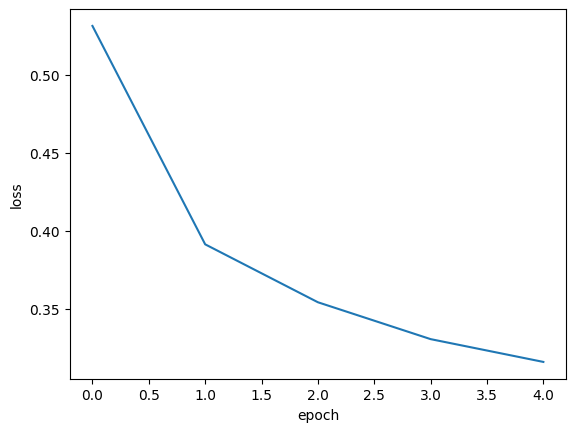

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
# 에포크별 손실 값을 그래프로 그림
# - `history.history['loss']`: 각 에포크에서 기록된 손실 값 리스트
# - x축은 에포크(epoch), y축은 손실(loss)

plt.xlabel('epoch')
# x축 라벨 설정: 'epoch' (훈련 반복 수)

plt.ylabel('loss')
# y축 라벨 설정: 'loss' (손실 값)

plt.show()
# 그래프를 화면에 출력

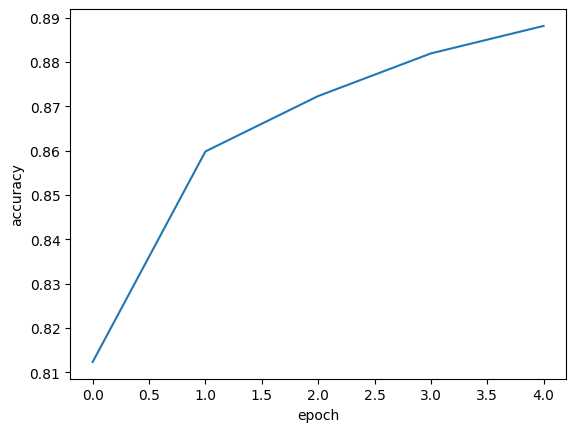

In [9]:
plt.plot(history.history['accuracy'])
# 에포크별 정확도 값을 그래프로 그림
# - `history.history['accuracy']`: 각 에포크에서 기록된 정확도 값 리스트
# - x축은 에포크(epoch), y축은 정확도(accuracy)

plt.xlabel('epoch')
# x축 라벨 설정: 'epoch' (훈련 반복 수)

plt.ylabel('accuracy')
# y축 라벨 설정: 'accuracy' (정확도 값)

plt.show()
# 그래프를 화면에 출력

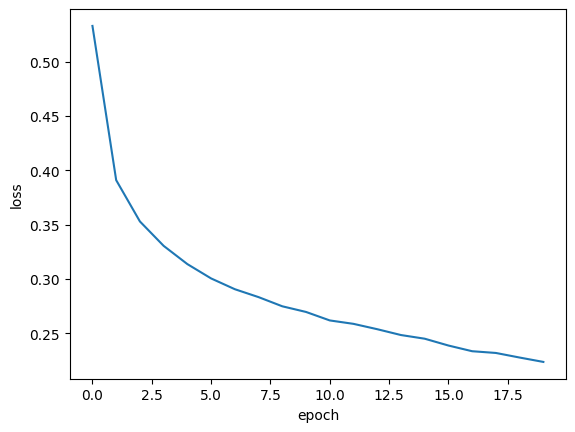

In [10]:
model = model_fn()
# 새로운 모델을 생성
# - 기본 신경망 구조: Flatten, Dense(100, ReLU), Dense(10, softmax)

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 컴파일
# - 손실 함수: sparse_categorical_crossentropy (다중 클래스 분류 문제)
# - 평가 지표: accuracy (정확도)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
# 모델 훈련
# - `train_scaled`: 정규화된 훈련 데이터
# - `train_target`: 훈련 데이터의 정답 레이블
# - `epochs=20`: 20번의 에포크 동안 모델 학습
# - `verbose=0`: 훈련 과정을 출력하지 않음 (조용한 모드)

plt.plot(history.history['loss'])
# 훈련 과정에서 기록된 손실 값을 그래프로 그림
# - x축: 에포크 (훈련 반복 수)
# - y축: 손실 값 (loss)

plt.xlabel('epoch')
# x축 라벨 설정: 'epoch'

plt.ylabel('loss')
# y축 라벨 설정: 'loss'

plt.show()
# 그래프를 화면에 출력

In [11]:
model = model_fn()
# 새로운 모델 생성
# - 기본 신경망 구조: Flatten, Dense(100, ReLU), Dense(10, softmax)

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 컴파일
# - 손실 함수: sparse_categorical_crossentropy (다중 클래스 분류 문제)
# - 평가 지표: accuracy (정확도)

history = model.fit(
    train_scaled, train_target,
    epochs=20, verbose=0,
    validation_data=(val_scaled, val_target)
)
# 모델 훈련
# - `train_scaled`, `train_target`: 훈련 데이터와 레이블
# - `epochs=20`: 20번의 에포크 동안 모델 학습
# - `verbose=0`: 훈련 상태 출력 생략 (조용한 모드)
# - `validation_data=(val_scaled, val_target)`:
#   - 검증 데이터로 학습 도중 성능 평가
#   - 검증 손실(`val_loss`)과 검증 정확도(`val_accuracy`)가 기록됨

print(history.history.keys())
# 학습 기록에서 사용 가능한 키 출력
# - `history.history`는 에포크별 학습 및 검증 데이터를 딕셔너리 형태로 저장
# - 출력 예시:
#   - `dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])`
#   - `loss`: 훈련 손실
#   - `accuracy`: 훈련 정확도
#   - `val_loss`: 검증 손실
#   - `val_accuracy`: 검증 정확도

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


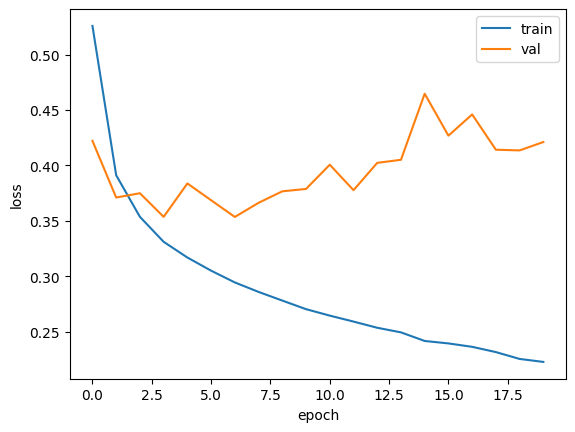

In [12]:
plt.plot(history.history['loss'])
# 훈련 손실 값 그래프
# - `history.history['loss']`: 각 에포크에서 기록된 훈련 손실 값 리스트

plt.plot(history.history['val_loss'])
# 검증 손실 값 그래프
# - `history.history['val_loss']`: 각 에포크에서 기록된 검증 손실 값 리스트

plt.xlabel('epoch')
# x축 라벨 설정: 'epoch' (훈련 반복 횟수)

plt.ylabel('loss')
# y축 라벨 설정: 'loss' (손실 값)

plt.legend(['train', 'val'])
# 범례 추가
# - 'train': 훈련 손실
# - 'val': 검증 손실
# - 그래프에서 훈련 손실과 검증 손실을 구분

plt.show()
# 그래프를 화면에 출력

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


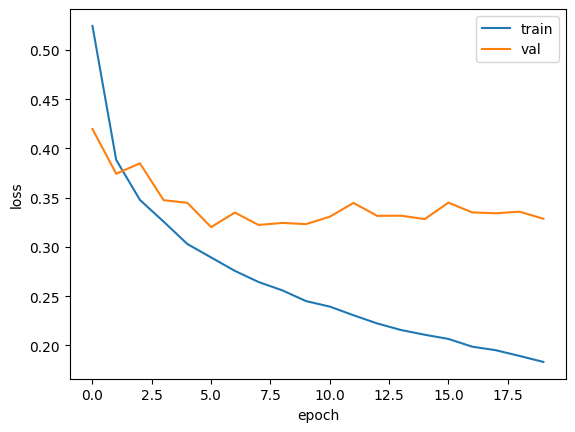

In [13]:
model = model_fn()
# 새로운 모델을 생성
# - 기본 신경망 구조: Flatten, Dense(100, ReLU), Dense(10, softmax)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 컴파일
# - 최적화 알고리즘: Adam (Adaptive Moment Estimation)
#   - 잘 동작하는 기본 최적화 알고리즘으로, 학습률을 자동으로 조정
# - 손실 함수: sparse_categorical_crossentropy (다중 클래스 분류 문제)
# - 평가 지표: accuracy (정확도)

history = model.fit(
    train_scaled, train_target,
    epochs=20, verbose=0,
    validation_data=(val_scaled, val_target)
)
# 모델 훈련
# - `train_scaled`, `train_target`: 훈련 데이터와 레이블
# - `epochs=20`: 20번의 에포크 동안 모델 학습
# - `verbose=0`: 훈련 상태 출력 생략 (조용한 모드)
# - `validation_data=(val_scaled, val_target)`:
#   - 검증 데이터로 학습 도중 성능 평가
#   - 검증 손실(`val_loss`)과 검증 정확도(`val_accuracy`)가 기록됨

plt.plot(history.history['loss'])
# 훈련 손실 값 그래프
# - `history.history['loss']`: 각 에포크에서 기록된 훈련 손실 값 리스트

plt.plot(history.history['val_loss'])
# 검증 손실 값 그래프
# - `history.history['val_loss']`: 각 에포크에서 기록된 검증 손실 값 리스트

plt.xlabel('epoch')
# x축 라벨 설정: 'epoch' (훈련 반복 횟수)

plt.ylabel('loss')
# y축 라벨 설정: 'loss' (손실 값)

plt.legend(['train', 'val'])
# 범례 추가
# - 'train': 훈련 손실
# - 'val': 검증 손실
# - 그래프에서 훈련 손실과 검증 손실을 구분

plt.show()
# 그래프를 화면에 출력

## 드롭아웃 (Dropout)

### 개요
드롭아웃(Dropout)은 신경망 모델에서 과적합(overfitting)을 방지하고 모델의 일반화 성능을 향상시키기 위한 정규화 기법임. 훈련 과정에서 뉴런을 무작위로 비활성화시켜, 모델이 특정 뉴런이나 경로에 의존하지 않도록 만들어 더 다양한 경로를 학습하도록 유도함. 이를 통해 모델이 훈련 데이터에 과도하게 적합되지 않게 하고, 새로운 데이터에 대해 더 잘 일반화되도록 함.

### 동작 원리
- **훈련 중 뉴런 비활성화**: 훈련 중 각 뉴런에 대해 일정 확률로 해당 뉴런을 "드롭"시키거나 비활성화함. 비활성화된 뉴런은 해당 에포크 동안 모델의 출력에 영향을 미치지 않음. 이렇게 비활성화되는 뉴런의 비율을 **드롭아웃 비율(dropout rate)**이라고 부름. 예를 들어, 드롭아웃 비율이 0.2라면, 각 에포크에서 20%의 뉴런이 비활성화됨.
- **모델 훈련 시 각기 다른 네트워크 학습**: 드롭아웃을 적용하면 네트워크가 매번 다른 뉴런 집합을 사용하여 학습함. 이는 마치 여러 개의 서로 다른 신경망을 훈련시키는 효과를 주며, 모델이 특정 뉴런에 의존하지 않게 만들고, 더 많은 특징을 학습하도록 돕는 효과가 있음.
- **테스트 시 드롭아웃 비활성화**: 테스트나 평가 과정에서는 모든 뉴런이 활성화된 상태로 모델이 동작함. 이를 통해 모델은 훈련 중에 비활성화된 뉴런을 포함한 전체 네트워크를 활용하여 최종 예측을 수행함.

### 드롭아웃의 효과
- **과적합 방지**: 드롭아웃의 주요 목적은 과적합을 방지하는 것임. 과적합은 모델이 훈련 데이터에 너무 잘 맞춰져서 새로운 데이터에 대한 예측 성능이 떨어지는 현상임. 드롭아웃은 훈련 중 일부 뉴런을 의도적으로 무시하여, 모델이 특정 뉴런에 과도하게 의존하지 않도록 유도함.
- **모델의 일반화 능력 향상**: 드롭아웃을 사용하면 모델이 다양한 하위 네트워크를 학습하게 되어, 더 많은 특징을 일반화하여 새로운 데이터에서도 잘 작동하는 모델을 만들어냄. 이는 특히 데이터가 적을 때 유용하며, 다양한 패턴을 학습할 수 있도록 도와줌.
- **신경망 다양성 증가**: 드롭아웃을 사용하면 훈련 중 각 에포크마다 네트워크가 다르게 학습됨. 즉, 같은 신경망 구조라도 매번 다른 뉴런들이 활성화되고 비활성화되기 때문에, 결국 여러 개의 신경망이 결합된 효과를 얻을 수 있음. 이러한 방식은 네트워크가 더 많은 데이터에 대해 잘 적응할 수 있도록 도와줌.

### 드롭아웃의 효과적인 사용
- **드롭아웃 비율 조정**: 드롭아웃 비율을 설정하는 것이 중요함. 일반적으로 0.2에서 0.5 사이의 값을 사용하며, 너무 낮으면 효과가 미미하고, 너무 높으면 모델 학습이 제대로 이루어지지 않을 수 있음. 일반적인 값은 0.5 정도이며, 이는 훈련 데이터에 비해 모델이 과도하게 복잡해지지 않도록 도와줌.
- **적절한 위치에 적용**: 드롭아웃은 주로 **완전 연결층(Dense layer)**에서 적용됨. 합성곱층(Convolutional layers)에서는 드롭아웃을 잘 적용하지 않는 경우가 많음, 이는 합성곱층의 특성상 파라미터 수가 적고, 과적합이 덜 발생하기 때문임. 따라서 주로 **Dense layer**나 **LSTM** 같은 순차적인 신경망에서 활용됨.

### 드롭아웃의 장단점
- **장점**:
  - **과적합 방지**: 과적합을 효과적으로 방지하여 모델의 일반화 성능을 높임.
  - **모델 학습 안정성**: 훈련 과정에서 다양한 경로를 학습하면서 모델이 보다 안정적으로 훈련됨.
  - **간단하고 효과적**: 구현이 간단하면서도 성능 향상에 큰 기여를 함.

- **단점**:
  - **훈련 시간이 길어질 수 있음**: 드롭아웃을 적용하면 매번 뉴런을 드롭하므로 학습할 수 있는 경로가 제한됨. 이는 훈련 속도를 늦출 수 있음.
  - **너무 많은 드롭아웃 비율은 성능 저하**: 드롭아웃 비율이 너무 높으면, 모델이 학습할 수 있는 정보가 적어져 성능이 오히려 나빠질 수 있음.

### 결론
드롭아웃은 신경망 모델에서 과적합을 방지하고, 더 일반화된 모델을 만들기 위한 강력한 도구임. 훈련 중 일부 뉴런을 비활성화하여 모델이 특정 뉴런에 의존하지 않도록 유도하고, 이를 통해 다양한 학습 경로를 제공함. 드롭아웃을 적절히 활용하면 모델의 성능을 크게 향상시킬 수 있음.